---------- Data Info (Columns, Data Types, Missing Values) ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


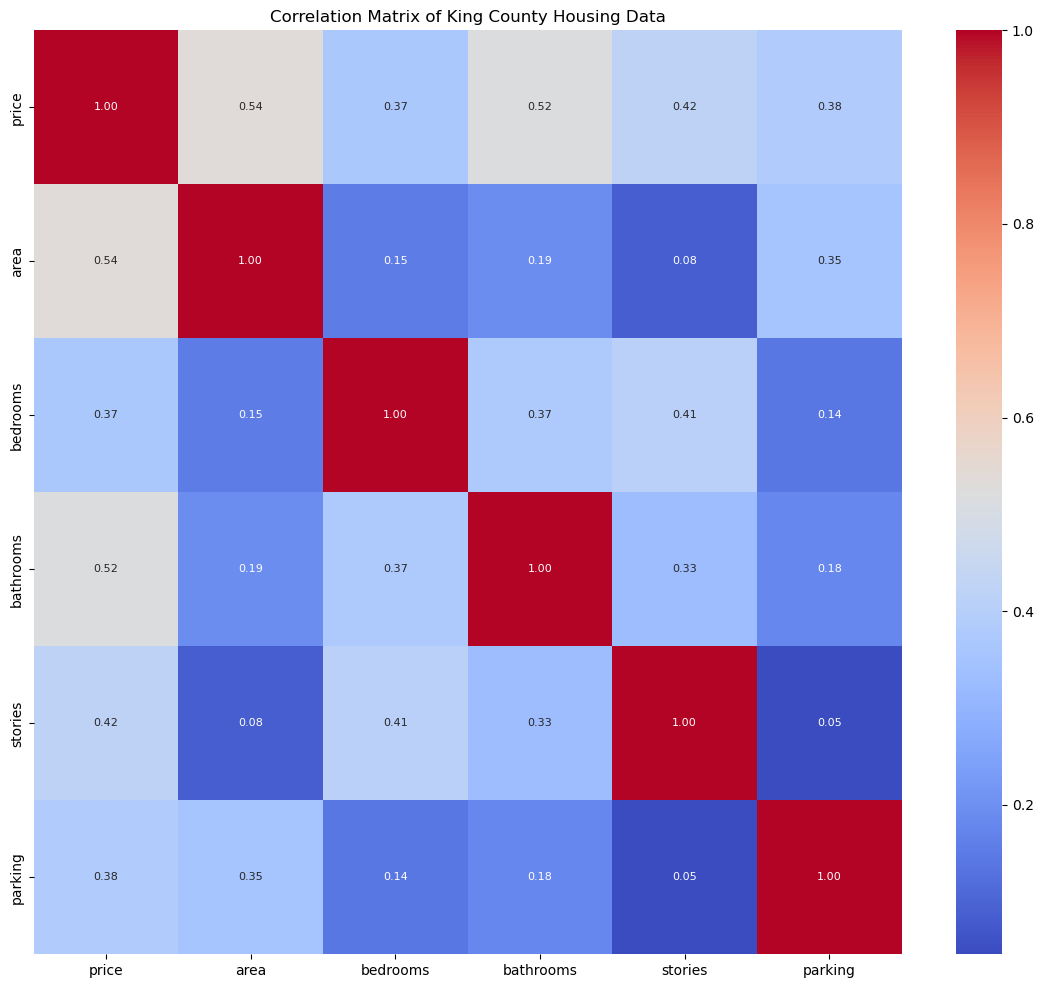

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load your specific dataset
df = pd.read_csv('kc_house_data.csv')

# 2. Perform initial inspection to understand the data
print("---------- Data Info (Columns, Data Types, Missing Values) ----------")
df.info()

# 3. Create a correlation heatmap to select features

plt.figure(figsize=(14, 12))


corr_matrix = df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix of King County Housing Data')
plt.show()

In [7]:
# --- Step A: Select Your Features and Target (Corrected) ---

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = df[features]
y = df[target]

print("Features (X) using correct column names:")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X) using correct column names:
   area  bedrooms  bathrooms  stories  parking
0  7420         4          2        3        2
1  8960         4          4        4        3
2  9960         3          2        2        2
3  7500         4          2        2        3
4  7420         4          1        2        2

Target (y):
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 381 samples
Testing set size: 164 samples


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print("\nModel has been trained successfully!")


Model has been trained successfully!


In [10]:
predictions = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, predictions)

mse = mean_squared_error(y_test, predictions)

print(f"R-squared (R²): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R-squared (R²): 0.53
Mean Squared Error (MSE): 2044165115591.79


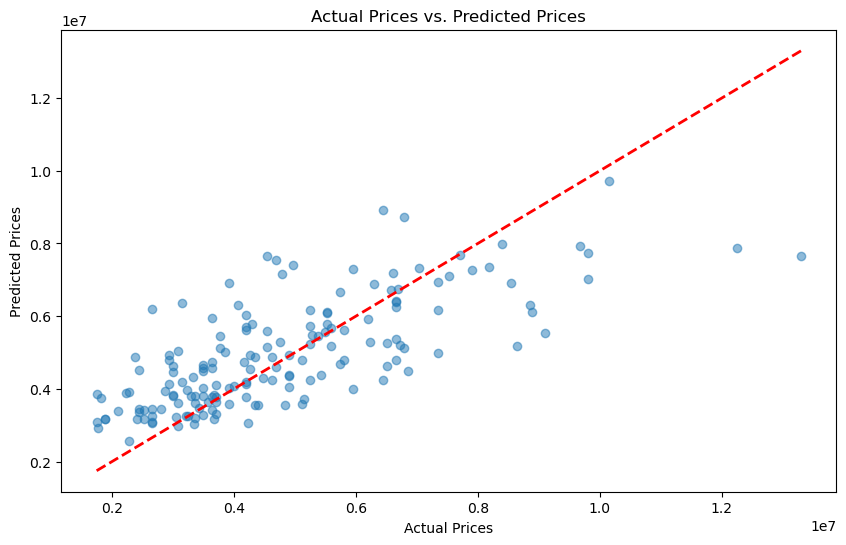

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)

plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()